# Stochastic Processes: Data Analysis and Computer Simulation.

Jupyter Notebook made like homework for the first week of the course. 
It was made by Ricardo Leal.                                                                       Date: 15/11/2020

## First problem.
For the first problem, we need to solve the next equation:

\begin{equation}
\frac{dy(t)}{dt}=-y(t)
\end{equation}

I'm are going to use like initial condition $y(0)=1$. I'm going to use the 2nd Runge-Kutta method to solve it numerically. 

In the next line, only are the libraries.

In [140]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')

The next part are the function that will plot the equation.

In [141]:
def plot(y,yan,t):
    plt.figure()
    plt.title('First problem with $y(0)=1$')
    plt.xlabel('$y(t)$ values.')
    plt.ylabel('$t$ values.')
    plt.plot(t,y,'--r',lw=2,label='Numerical solution.')
    plt.plot(t,yan,'--g',lw=1,label='Analytical solution.')
    plt.plot(t,y/yan,'b',lw=1,label='Ratio $y/y_{an}$')
    plt.legend()

In the next line, we are going to write the numerical method. Like we use the 2nd order of Runge Kutta method, i only gonna use $k_1$ and $k_2$. 

Remember the definition of the $k_n$, that's:

\begin{equation}
  \begin{array}{c}
    k_1=f(y_{i},t_{i}) \\
    k_2=f(y_{i}+\frac{dt}{2}k_1,t_{i}+\frac{dt}{2})
  \end{array}
\end{equation}

In this case, we know that our function is $f(y,t)=y$, so with that we know that the $k_1$ and $k_2$ are:

\begin{equation}
 \begin{array}{c}
   k_1=y{t_i} \\
   k_2=-\frac{dt}{2}y(t_i)
 \end{array}
\end{equation}

So, our numerical aproximation to the equation is:

\begin{equation}
 y(t+dt)=y(t)-dt(k_1+k_2)
\end{equation}

That is down our _for_ range.

In [142]:
def runge(IC,t,It):
    y=np.zeros(It) #This is for create the little matrix for the values of y.
    y[0]=IC
    
    for i in range(It-1):
        k1=y[i]
        k2=-0.5*dt*y[i]

        y[i+1]=y[i]-dt*(k1+k2)
    return y

The next line is the rest of the code. That means that the next line it's include the initial values, the total of steps, etcetera. Here I call the functions write before.

<IPython.core.display.Javascript object>


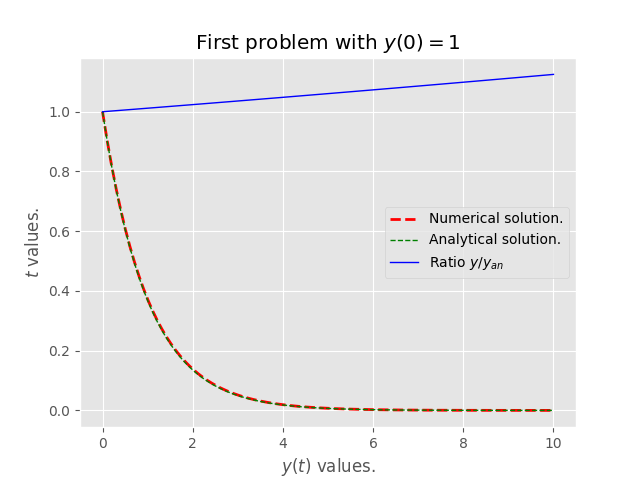

In [143]:
dt  = 0.1 #This is the infinitisemal changes in the time.
t0  = 0    #This is the initial time of simulation.
tf  = 10   #This is the final time of simulation.
It  = int((tf-t0)/dt) #This is the total of steps made with dt.

t   = np.linspace(t0,tf,It) #Get the same t values that we are going to get with the dt.
yan =np.exp(-t) #This is the analytical solution.

IC  =1.0  #This is the initial condition of the system. 

y   =runge(IC,t,It) #It call the function of Runge Kutta to get the numerical values of y.
graf=plot(y,yan,t)  #This will graph the solutions.

## Second problem.

In this case, the problem is to solve the harmonic oscilator. The equations are:

\begin{equation}
 \begin{array}{c}
 \vec{F}=-k\vec{R} \\
 E_t=\frac{1}{2}mV^2+\frac{1}{2}kR^2
 \end{array}
\end{equation}

In this case, we can solve the problem knowing that $\vec{F}=m\frac{d\vec{V}}{dt}$. So in this case, the equation is:

\begin{equation}
  m\frac{d\vec{V}}{dt}=-k\vec{R}
\end{equation}

The aproximation of $\frac{d\vec{V}}{dt}$ it's numerical. That means that we can aproximate with the Euler method. Just we need to notice that exist friction in the system, so we need to add one extra term that can includes our friction $\zeta$ divide by the mass. The aproximation of the derivate is:

\begin{equation}
\frac{d\vec{V}}{dt}\approx \frac{\vec{V}_{t+1}-\vec{V}_{t}}{dt}+\frac{\zeta}{m}\vec{V}_{t}
\end{equation}

I'm gonna use the Runge-Kutta method, it's easy to see that our solution is:

\begin{equation}
\vec{V}_{t+1}=\vec{V}_{t}-dt(\vec{V}_{t}\frac{\zeta}{m}-\frac{k}{m}\vec{R})
\end{equation}

For this, I need to use a 4th order Runge-Kutta method. I use the same libraries so thats it's not a problem. In this case, we use a 4th order Runge-Kutta method, so we need $k_{1,2,3,4}$ to solve the problem. The good of use this order it's the magnitue of the error, more order means less error. 

Of the past equation, it's easy to check that the function $f(V,R)=\vec{V}_{t}\frac{\zeta}{m}-\frac{k}{m}\vec{R}$

Like in the past problem, our $k_n$ are:

\begin{equation}
  \begin{array}{c}
    k_1=f(V_{i},t_{i}) \\
    k_2=f(V_{i}+\frac{dt}{2}k_1,R_{i}+\frac{dt}{2}) \\
    k_3=f(V_{i}+\frac{dt}{2}k_2,R_{i}+\frac{dt}{2}) \\
    k_4=f(V_{i}+dtk_3,R_{i}+dt)
  \end{array}
\end{equation}

Knowing that $f(R,t)=\vec{R}$, we have the following $k_n$:

\begin{equation}
  \begin{array}{c}
    k_1=\vec{V}_{t}\frac{\zeta}{m}-\frac{k}{m}\vec{R} \\
    k_2=(\vec{V}_{t}+\frac{dt}{2}k_1)\frac{\zeta}{m}-\frac{k}{m}(\vec{R}+\frac{dt}{2}) \\
    k_3=(\vec{V}_{t}+\frac{dt}{2}k_2)\frac{\zeta}{m}-\frac{k}{m}(\vec{R}+\frac{dt}{2}) \\
    k_4=(\vec{V}_{t}+dtk_3)\frac{\zeta}{m}-\frac{k}{m}(\vec{R}+dt)
  \end{array} 
\end{equation}

So, the numerical aproximation is:

\begin{equation}
\vec{V}_{t+1}=V_{t}-dt(k_1+k_2+k_3+k_4)
\end{equation}

For the case of the total energy $(E_t)$, we only have to calculate the norm of the vectors $\vec{V}$ and $\vec{R}$. That leave us the following equation:

\begin{equation}
E_t=\frac{1}{2}m||V||^2+\frac{1}{2}k||R||^2
\end{equation}

The next code box it's the function that solve this numerically.

In [144]:
#dim=2
#N=1000
#R=np.zeros([dim,N])
#V=np.zeros([dim,N])
#Et=np.zeros(N)
#time=np.zeros(N)

def r4th(N):
    k1=V*(zeta/m)-(k/m)*R
    k2=(V+(dt/2)*k1)*(zeta/m)-(k/m)*(R+dt/2)
    k3=(V+(dt/2)*k2)*(zeta/m)-(k/m)*(R+dt/2)
    k4=(V+dt*k1)*(zeta/m)-(k/m)*(R+dt)


<IPython.core.display.Javascript object>


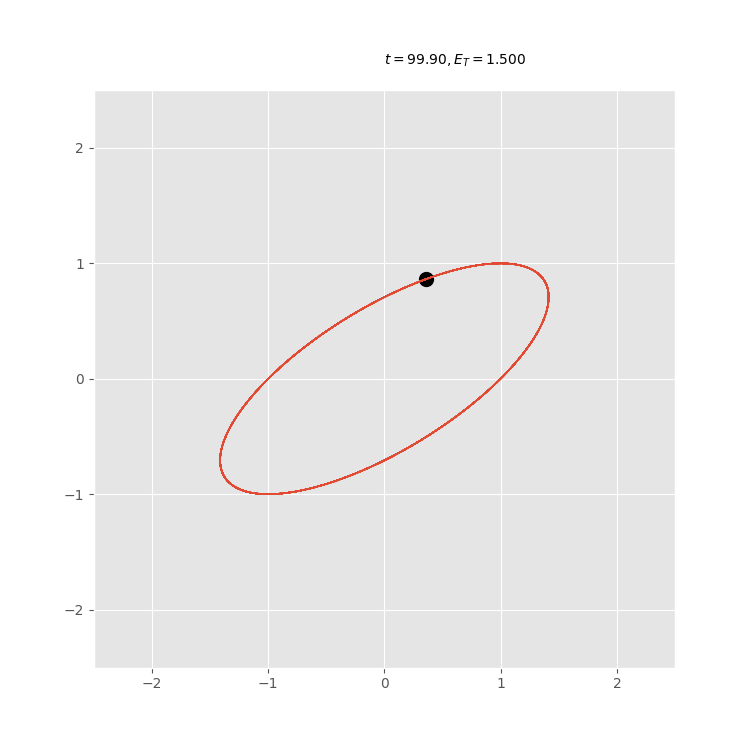

In [145]:
dim= 2  #The dimension of the system.
N= 1000 #The number of steps
R=np.zeros(dim) #The position of the particle
V=np.zeros(dim) #The velocity of the particle
Rs=np.zeros([dim,N]) #The position of the particle in all the steps
Vs=np.zeros([dim,N]) #The velocity of the particle in all the steps
Et=np.zeros(N) #The total energy of the system
time=np.zeros(N) #The total time of the system

def init():
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title

# C24
R1    = np.zeros(dim)
V1    = np.zeros(dim)
R2    = np.zeros(dim)
V2    = np.zeros(dim)
R3    = np.zeros(dim)
V3    = np.zeros(dim)
R4    = np.zeros(dim)
V4    = np.zeros(dim)
def animate(i):
    global R,V,F,Rs,Vs,time,Et
    V1 = V - zeta/m*0.5*dt*V - k/m*0.5*dt*R
    R1 = R + V*0.5*dt
    V2 = V - zeta/m*0.5*dt*V1 - k/m*0.5*dt*R1
    R2 = R + V1*0.5*dt
    V3 = V - zeta/m*dt*V2 - k/m*dt*R2
    R3 = R + V2*dt
    V4 = V - (V+V1*2+V2*2+V3)/6.*zeta/m*dt - k/m*dt*(R+R1*2+R2*2+R3)/6.
    R4 = R + (V+V1*2+V2*2+V3)/6.*dt 
    R  = R4
    V  = V4
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1])
    line.set_data(Rs[0,0:i], Rs[1,0:i])
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

# System parameters
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.00
# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
dt   = 0.1*np.sqrt(k/m) # set \Delta t
box  = 5 # set size of draw area
# set up the figure, axis, and plot element for animatation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2)) # draw range
particles, = ax.plot([],[],'ko', ms=10) # setup plot for particle 
line,=ax.plot([],[],lw=1) # setup plot for trajectry
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center') # title
anim=animation.FuncAnimation(fig,animate,init_func=init,
     frames=N,interval=5,blit=True,repeat=False) # draw animation
# anim.save('movie.mp4',fps=20,dpi=400)

<IPython.core.display.Javascript object>


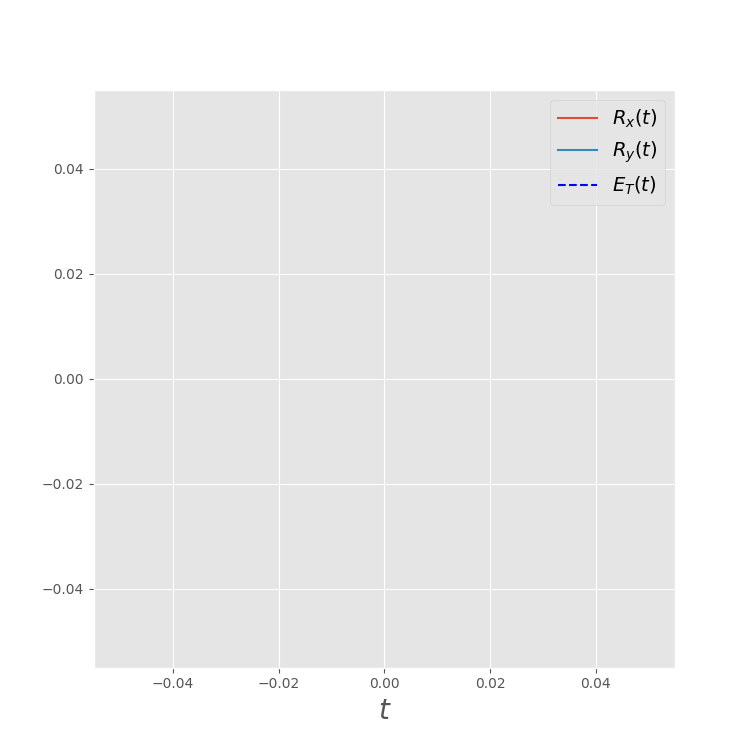

In [146]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et,'--b') # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()